In [4]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [5]:
df = pd.read_csv("../datasets/NVDA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,63.840000,66.489998,63.397499,66.397499,66.175499,60225200
1,2020-03-31,66.800003,68.849998,64.437500,65.900002,65.679657,94996000
2,2020-04-01,63.912498,65.382500,60.320000,60.767502,60.564335,65691200
3,2020-04-02,61.060001,64.000000,60.577499,63.867500,63.653969,67576400
4,2020-04-03,63.490002,63.907501,59.597500,60.977501,60.773628,66321200
...,...,...,...,...,...,...,...
1002,2024-03-22,911.409973,947.780029,908.340027,942.890015,942.890015,58521500
1003,2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
1004,2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
1005,2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,250.705936,255.376241,245.904255,250.927244,250.711627,4.644366e+07
std,167.664437,170.538883,164.514649,167.755675,167.825036,1.819891e+07
min,61.060001,63.907501,59.597500,60.767502,60.564335,9.788400e+06
25%,136.157501,138.380005,133.485001,135.742500,135.439705,3.435825e+07
50%,192.649994,196.300003,187.619995,192.649994,192.555527,4.467990e+07
75%,294.699997,302.199997,284.494995,293.449997,293.032059,5.649280e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,1.543911e+08


In [9]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [10]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.index = df.index.strftime('%m/%d/%Y')

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03/30/2020,63.840000,66.489998,63.397499,66.397499,66.175499,60225200
03/31/2020,66.800003,68.849998,64.437500,65.900002,65.679657,94996000
04/01/2020,63.912498,65.382500,60.320000,60.767502,60.564335,65691200
04/02/2020,61.060001,64.000000,60.577499,63.867500,63.653969,67576400
04/03/2020,63.490002,63.907501,59.597500,60.977501,60.773628,66321200


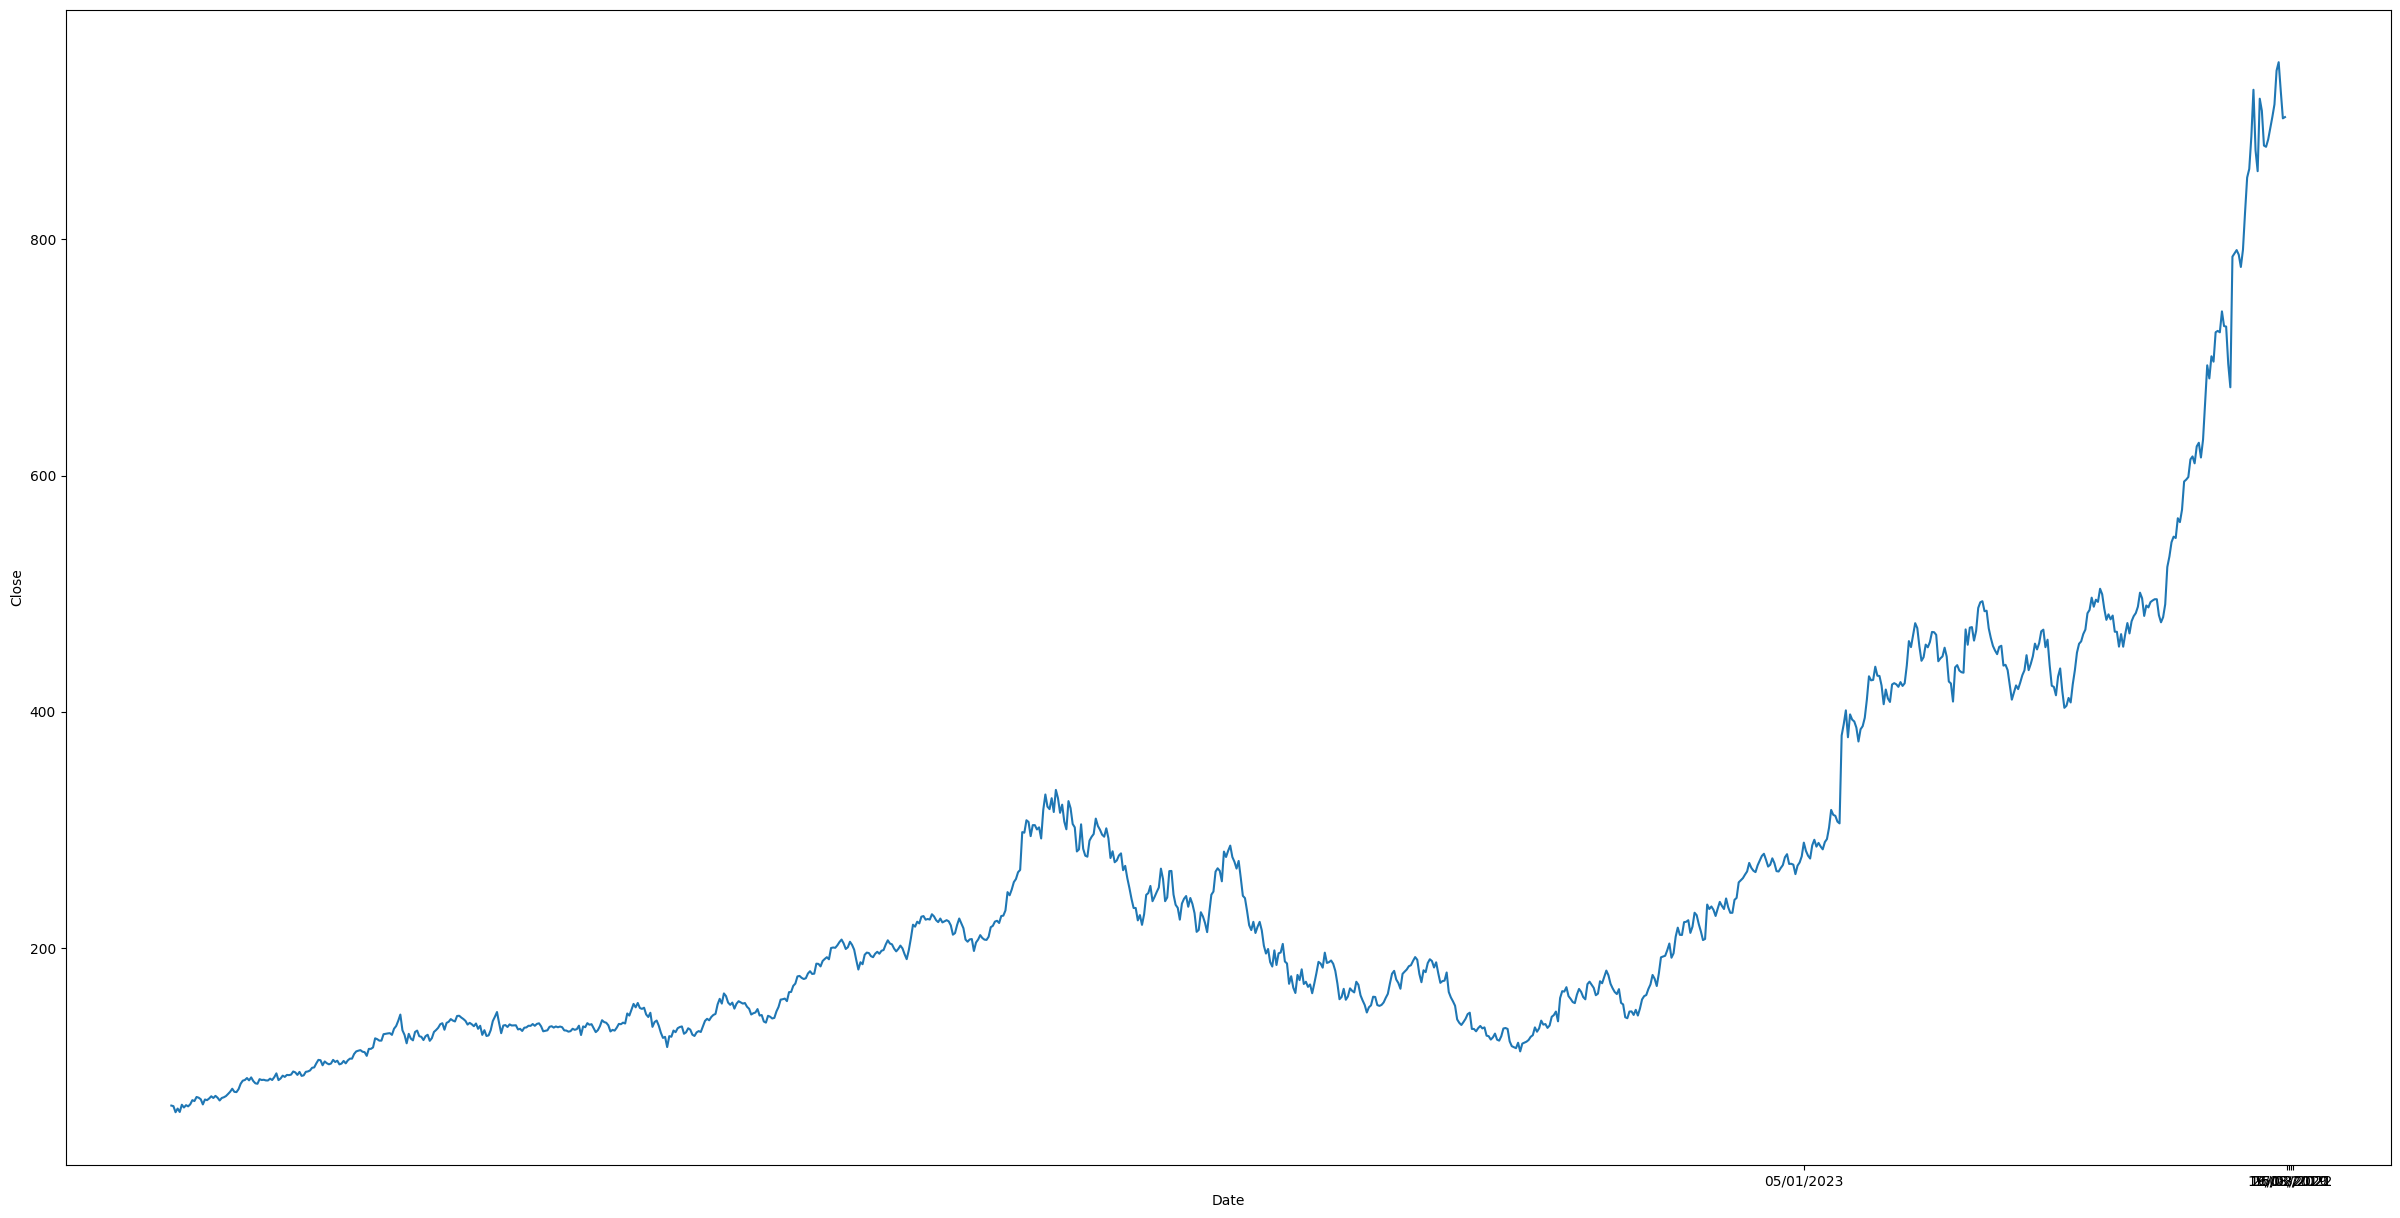

In [13]:
data=df.copy()
plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.show()

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03/30/2020,63.840000,66.489998,63.397499,66.397499,66.175499,60225200
03/31/2020,66.800003,68.849998,64.437500,65.900002,65.679657,94996000
04/01/2020,63.912498,65.382500,60.320000,60.767502,60.564335,65691200
04/02/2020,61.060001,64.000000,60.577499,63.867500,63.653969,67576400
04/03/2020,63.490002,63.907501,59.597500,60.977501,60.773628,66321200
...,...,...,...,...,...,...
03/22/2024,911.409973,947.780029,908.340027,942.890015,942.890015,58521500
03/25/2024,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
03/26/2024,958.510010,963.750000,925.020020,925.609985,925.609985,51364800


In [15]:
ma_day = [30, 60, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

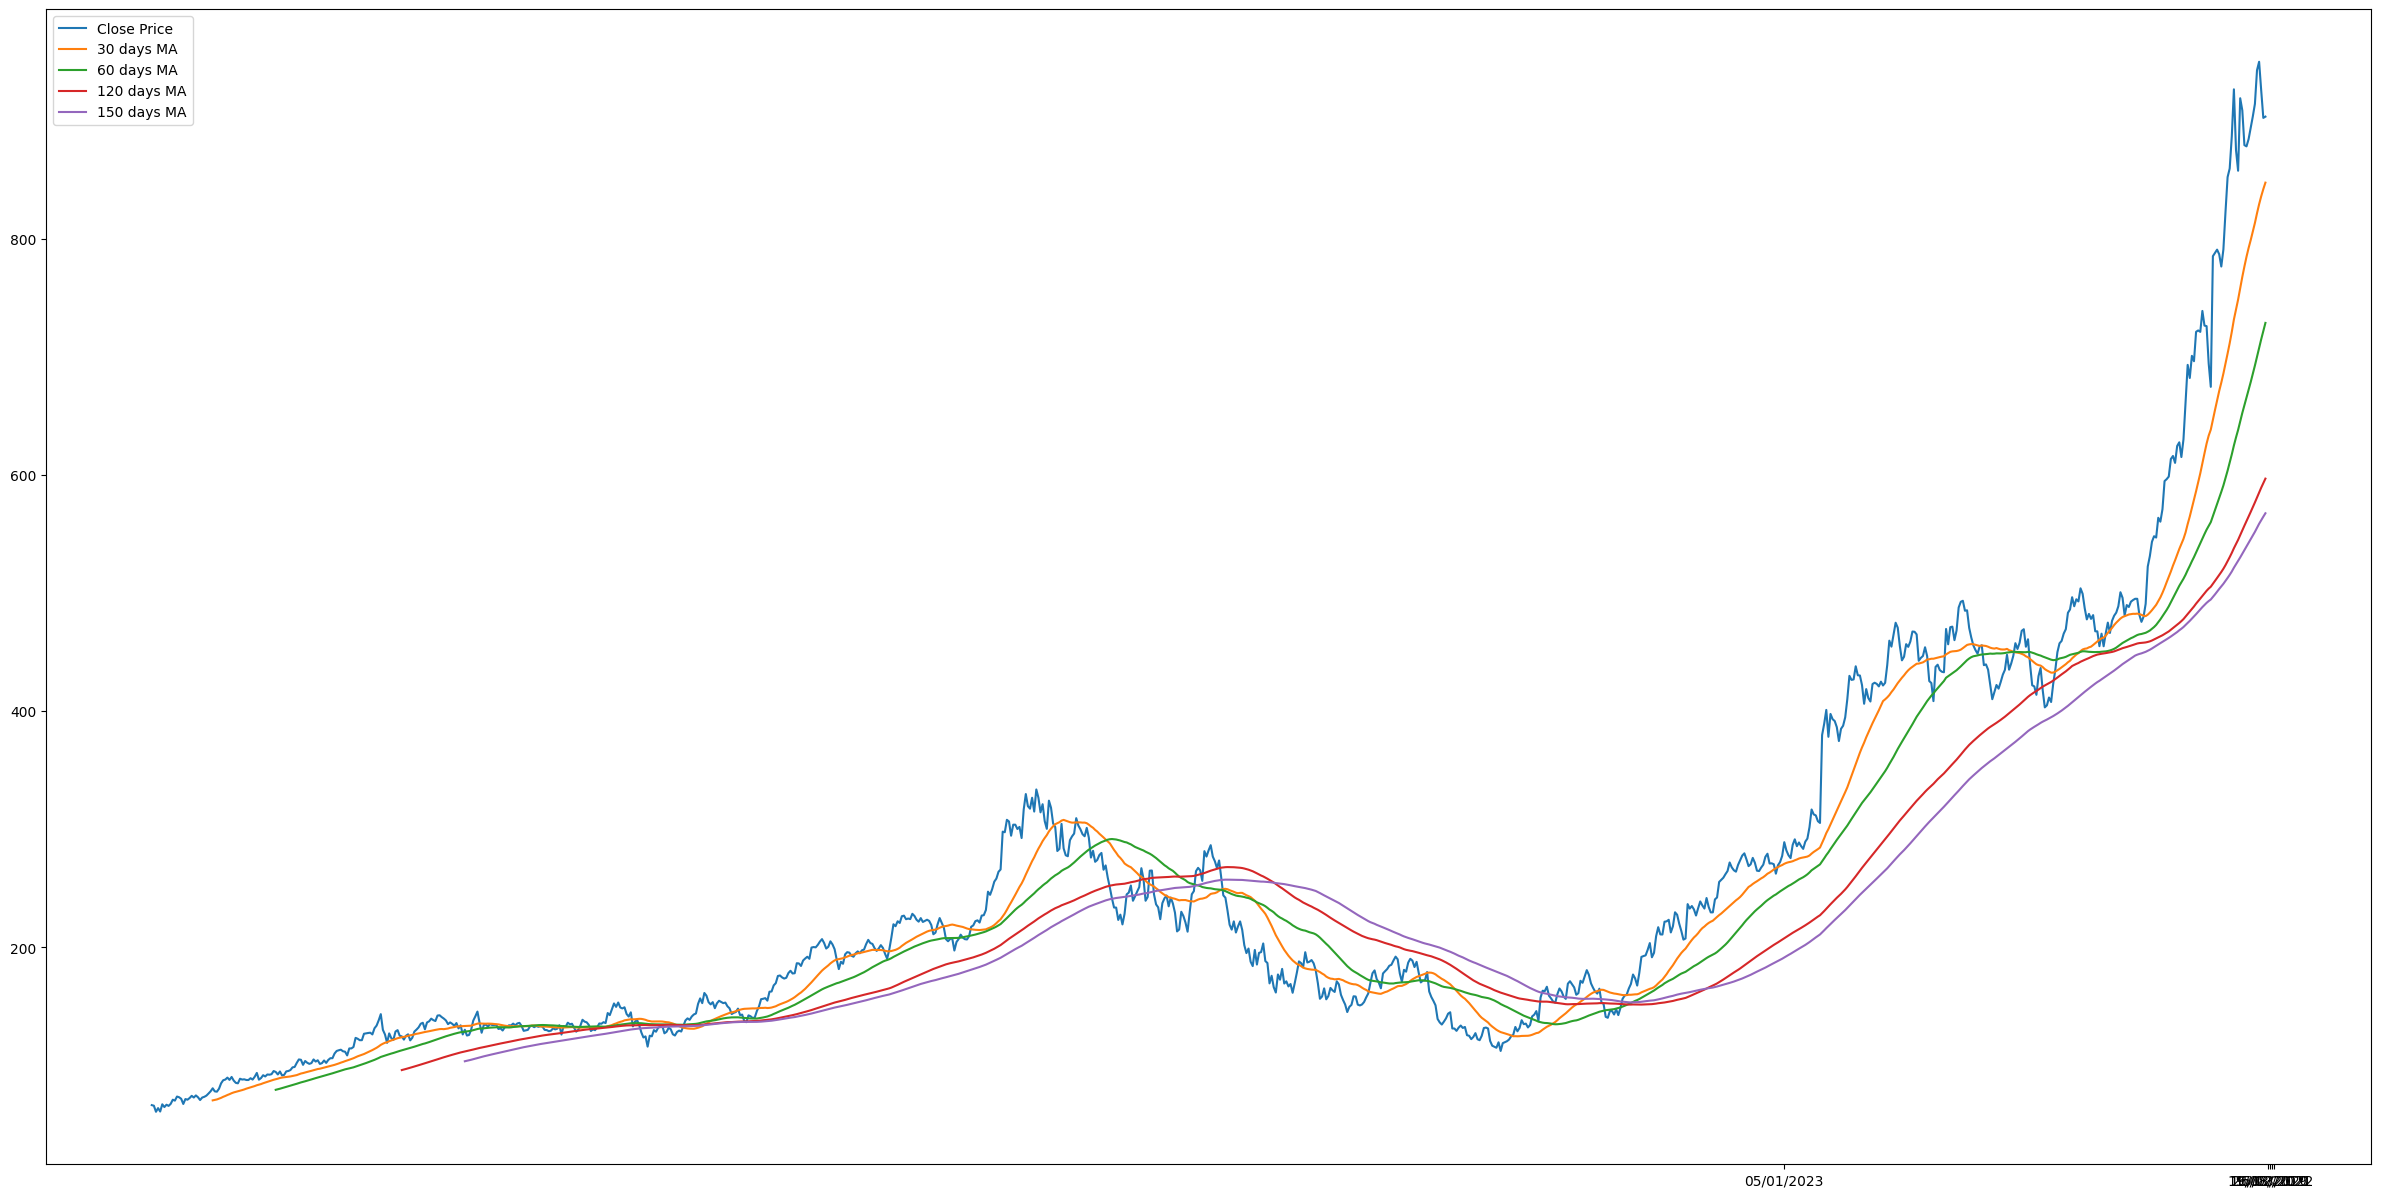

In [16]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [17]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:646,]
test_data=final_df[646:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:646].index
test_df['Close'] = test_data
test_df.index = new_df[646:].index

In [18]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (646, 1)
test_data:  (361, 1)


In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

In [20]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_data, y_train_data, epochs = 150, batch_size = 32);

Epoch 1/150
19/19 [==============================] - 8s 44ms/step - loss: 0.0053
Epoch 2/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0012
Epoch 3/150
19/19 [==============================] - 1s 43ms/step - loss: 0.0011
Epoch 4/150
19/19 [==============================] - 1s 43ms/step - loss: 8.2615e-04
Epoch 5/150
19/19 [==============================] - 1s 44ms/step - loss: 7.7532e-04
Epoch 6/150
19/19 [==============================] - 1s 43ms/step - loss: 7.1001e-04
Epoch 7/150
19/19 [==============================] - 1s 43ms/step - loss: 6.2684e-04
Epoch 8/150
19/19 [==============================] - 1s 44ms/step - loss: 6.6457e-04
Epoch 9/150
19/19 [==============================] - 1s 43ms/step - loss: 6.8760e-04
Epoch 10/150
19/19 [==============================] - 1s 43ms/step - loss: 5.3729e-04
Epoch 11/150
19/19 [==============================] - 1s 43ms/step - loss: 5.4429e-04
Epoch 12/150
19/19 [==============================] - 1s 44ms/step - loss: 

In [22]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [23]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [24]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

12/12 [==============================] - 1s 15ms/step


In [25]:
test_df['Predictions']=predicted

In [26]:
test_df

,Close,Predictions
Date,,
10/20/2022,121.940002,128.994965
10/21/2022,124.660004,130.505432
10/24/2022,125.989998,132.178619
10/25/2022,132.610001,133.861084
10/26/2022,128.960007,136.620300
...,...,...
03/22/2024,942.890015,783.861572
03/25/2024,950.020020,806.436462
03/26/2024,925.609985,820.420105


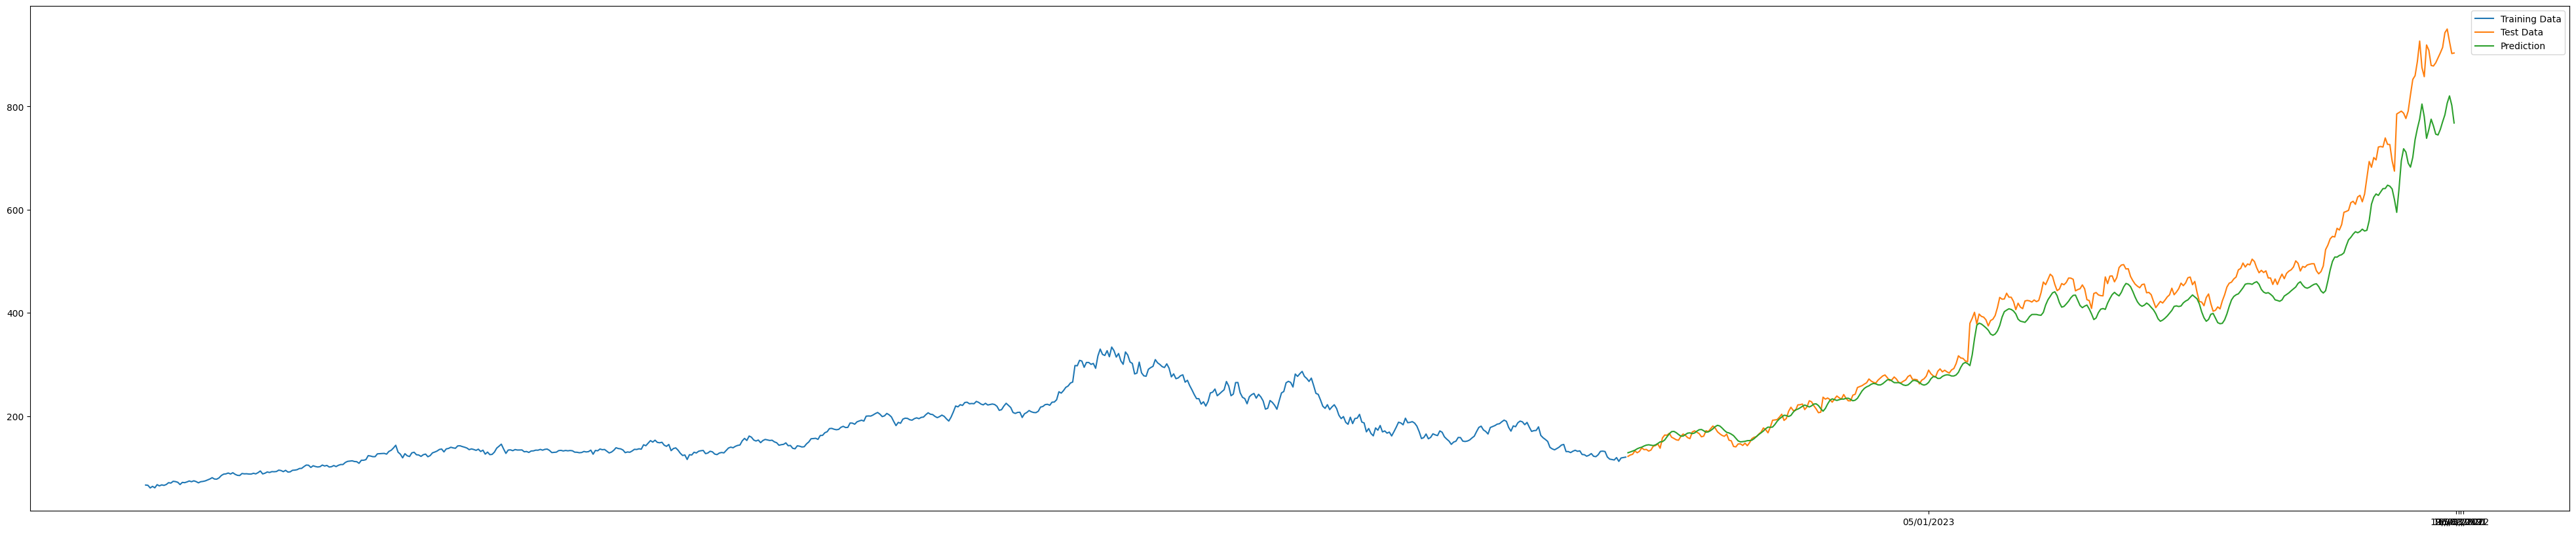

In [27]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [28]:
new_df[-1]

903.559998

In [29]:
recent_data = new_df[-60:].values  # Assuming new_df contains the entire historical data
scaled_recent_data = scaler.transform(recent_data.reshape(-1, 1))

# Reshape and format the input data
X_future = scaled_recent_data.reshape((1, 60, 1))

# Make the prediction
predicted_price = model.predict(X_future)

# Inverse scale the prediction
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted price for 1st April 2024:", predicted_price[0][0])

1/1 [==============================] - 0s 21ms/step
Predicted price for 1st April 2024: 750.965


In [30]:
new_df

Date
03/30/2020     66.397499
03/31/2020     65.900002
04/01/2020     60.767502
04/02/2020     63.867500
04/03/2020     60.977501
                 ...    
03/22/2024    942.890015
03/25/2024    950.020020
03/26/2024    925.609985
03/27/2024    902.500000
03/28/2024    903.559998
Name: Close, Length: 1007, dtype: float64

In [31]:
new_df = pd.concat([new_df, pd.Series(predicted_price[0][0], index=[pd.Timestamp(f'2024-04-01')])])

In [32]:
new_df

03/30/2020              66.397499
03/31/2020              65.900002
04/01/2020              60.767502
04/02/2020              63.867500
04/03/2020              60.977501
                          ...    
03/25/2024             950.020020
03/26/2024             925.609985
03/27/2024             902.500000
03/28/2024             903.559998
2024-04-01 00:00:00    750.965027
Length: 1008, dtype: float64

In [33]:
import pandas as pd
predicted_prices = []

# Iterate over each day from 1st April to 30th April
for day in range(2, 31):
    # Prepare input data for the current day
    start_index = len(new_df) - 60  # Start index of the last 60 days
    end_index = len(new_df)  # End index is exclusive
    input_data = new_df.iloc[start_index:end_index].values.reshape(-1, 1)
    scaled_input_data = scaler.transform(input_data)
    X_day = scaled_input_data.reshape((1, 60, 1))
    
    # Predict the price for the current day
    predicted_price = model.predict(X_day)
    predicted_price = scaler.inverse_transform(predicted_price)
    
    # Append the predicted price to the list
    predicted_prices.append(predicted_price[0][0])
    
    # Create a new Series with the predicted price and concatenate it with the original Series
    new_df = pd.concat([new_df, pd.Series(predicted_price[0][0], index=[pd.Timestamp(f'2024-04-{day}')])])

# Convert the Series to a DataFrame
df = new_df.to_frame(name='Close')

# Display the DataFrame with predicted prices for April
print(df.head())


1/1 [==============================] - 0s 20ms/step
                Close
03/30/2020  66.397499
03/31/2020  65.900002
04/01/2020  60.767502
04/02/2020  63.867500
04/03/2020  60.977501


In [36]:
nvidia_prediction = df[-30:]
type(nvidia_prediction)

pandas.core.frame.DataFrame

In [37]:
nvidia_prediction.to_csv(r"C:\Users\Ritesh\Desktop\TeamSynergy_Codeshastra\results\nvidia_prediction.csv")